In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
df = pd.read_csv('../data/premier_league_medias_por_jogador.csv')
df.describe()

,#,Minutes,Goals,Assists,Penalty Shoot on Goal,Penalty Shoot,Total Shoot,Shoot on Target,Yellow Cards,Red Cards,...,Shot-Creating Actions,Goal-Creating Actions,Passes Completed,Passes Attempted,Pass Completion %,Progressive Passes,Carries,Progressive Carries,Dribble Attempts,Successful Dribbles
count,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,478.000000,...,478.000000,478.000000,478.00000,478.000000,475.000000,478.000000,478.000000,478.000000,478.000000,478.000000
mean,18.310356,57.170105,0.069833,0.053787,0.003912,0.004874,0.701192,0.232573,0.146736,0.004644,...,1.272657,0.127803,23.65090,28.888285,78.208716,2.118954,19.980941,1.032469,1.021130,0.446506
std,13.674335,27.690957,0.130569,0.096087,0.024357,0.026132,0.738548,0.315561,0.154406,0.024006,...,1.125251,0.178451,16.74066,18.766455,11.648514,1.768015,12.522863,1.132296,1.137533,0.531274
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,34.572500,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,...,0.400000,0.000000,9.64750,13.052500,72.580000,0.715000,10.200000,0.250000,0.185000,0.000000
50%,16.785000,61.750000,0.000000,0.000000,0.000000,0.000000,0.500000,0.140000,0.120000,0.000000,...,1.000000,0.070000,21.87000,27.765000,79.110000,1.960000,18.960000,0.670000,0.695000,0.290000
75%,25.000000,83.450000,0.090000,0.080000,0.000000,0.000000,1.000000,0.330000,0.250000,0.000000,...,1.812500,0.210000,32.93750,41.105000,86.175000,3.140000,27.427500,1.430000,1.445000,0.620000
max,87.000000,90.000000,0.930000,0.770000,0.290000,0.290000,4.640000,2.430000,1.000000,0.250000,...,6.150000,1.620000,99.00000,107.000000,100.000000,9.000000,70.000000,8.200000,7.220000,3.780000


In [10]:
from mlxtend.frequent_patterns import apriori, association_rules

for col in ['Pass Completion %', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)', 'Expected Assists (xAG)']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '.').astype(float)

df_selected = df[['Team', 'Nation', 'Position', 'Goals']].copy()

bins = [-1, 0, 5, 10, df_selected['Goals'].max()]

bins = sorted(list(set(bins)))

labels = [f'Gols: {bins[i]+1}-{bins[i+1]}' for i in range(len(bins) - 1)]

if bins[0] == -1 and bins[1] == 0:
    labels[0] = 'Gols: 0'

if bins[-2] == 10 and bins[-1] == df_selected['Goals'].max():
     labels[-1] = 'Gols: 11+'
elif bins[-1] == df_selected['Goals'].max():
    labels[-1] = f'Gols: {bins[-2]+1}+'

df_selected['Goals_Category'] = pd.cut(df_selected['Goals'], bins=bins, labels=labels, right=True, include_lowest=True)
df_selected = df_selected.drop('Goals', axis=1)

df_encoded = pd.get_dummies(df_selected).astype(bool)

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

selected_rules = rules[rules['lift'] > 1.5].sort_values(by=['lift', 'confidence'], ascending=[False, False])

display_rules = selected_rules.copy()
display_rules['antecedents'] = display_rules['antecedents'].apply(list)
display_rules['consequents'] = display_rules['consequents'].apply(list)

print(display_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].head())

ModuleNotFoundError: No module named 'mlxtend'

/tmp/ipython-input-669934841.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Nation'], order=df['Nation'].value_counts().iloc[:10].index, palette='viridis')


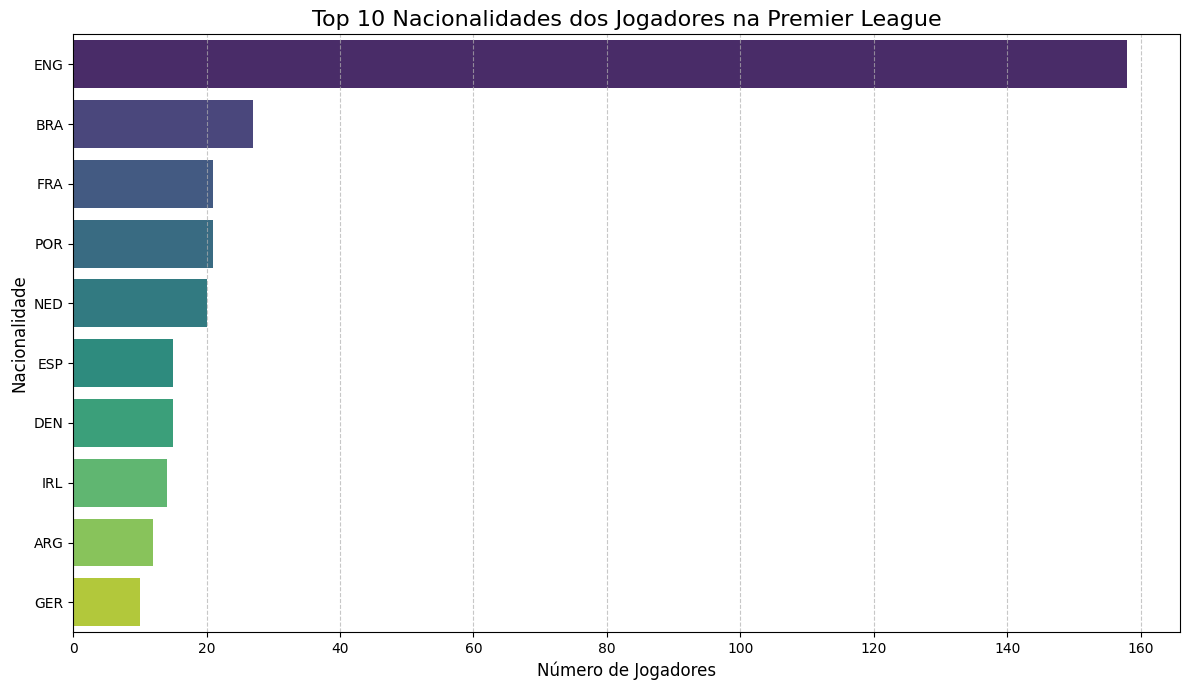

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.countplot(y=df['Nation'], order=df['Nation'].value_counts().iloc[:10].index, palette='viridis')
plt.title('Top 10 Nacionalidades dos Jogadores na Premier League', fontsize=16)
plt.xlabel('Número de Jogadores', fontsize=12)
plt.ylabel('Nacionalidade', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

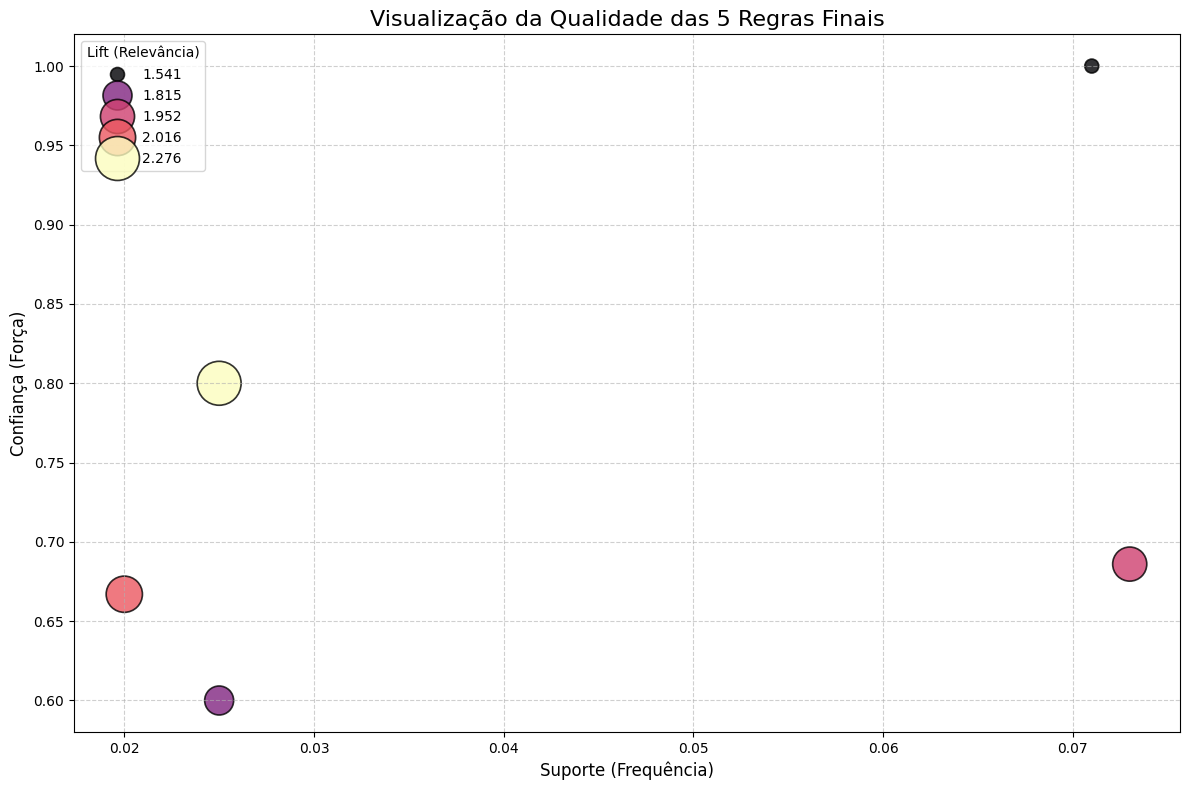

In [ ]:
regras_encontradas = pd.DataFrame({
    'support': [0.025, 0.020, 0.073, 0.025, 0.071],
    'confidence': [0.800, 0.667, 0.686, 0.600, 1.000],
    'lift': [2.276, 2.016, 1.952, 1.815, 1.541]
})

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=regras_encontradas, x="support", y="confidence",
    size="lift", hue="lift", sizes=(100, 1000),
    palette="magma", alpha=0.8, edgecolor="black"
)
plt.title('Visualização da Qualidade das 5 Regras Finais', fontsize=16)
plt.xlabel('Suporte (Frequência)', fontsize=12)
plt.ylabel('Confiança (Força)', fontsize=12)
plt.legend(title='Lift (Relevância)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

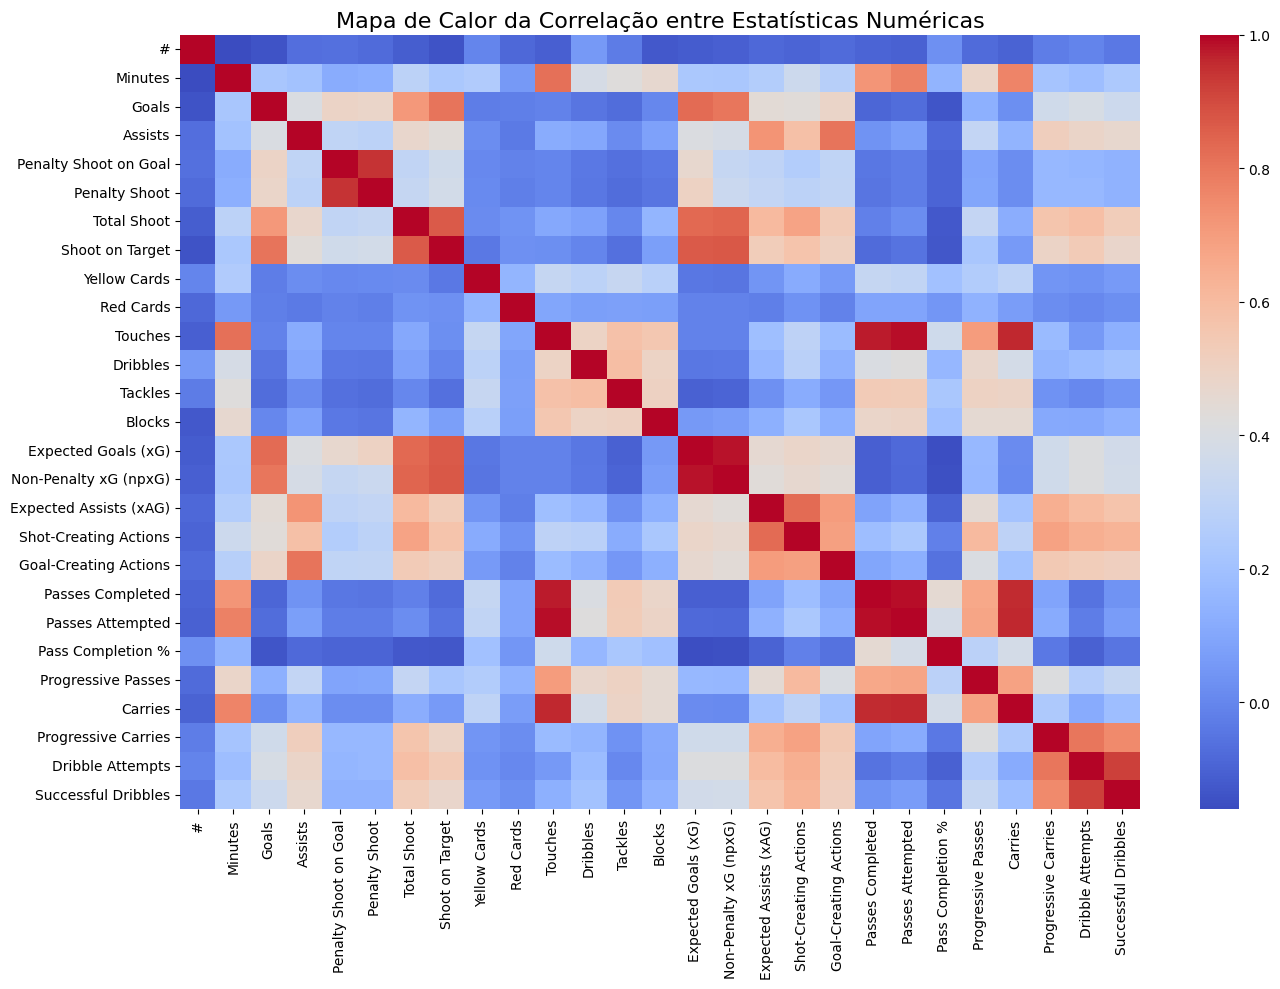

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Mapa de Calor da Correlação entre Estatísticas Numéricas', fontsize=16)
plt.tight_layout()

/tmp/ipython-input-2062229044.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Position'], order=df['Position'].value_counts().iloc[:10].index, palette='crest')


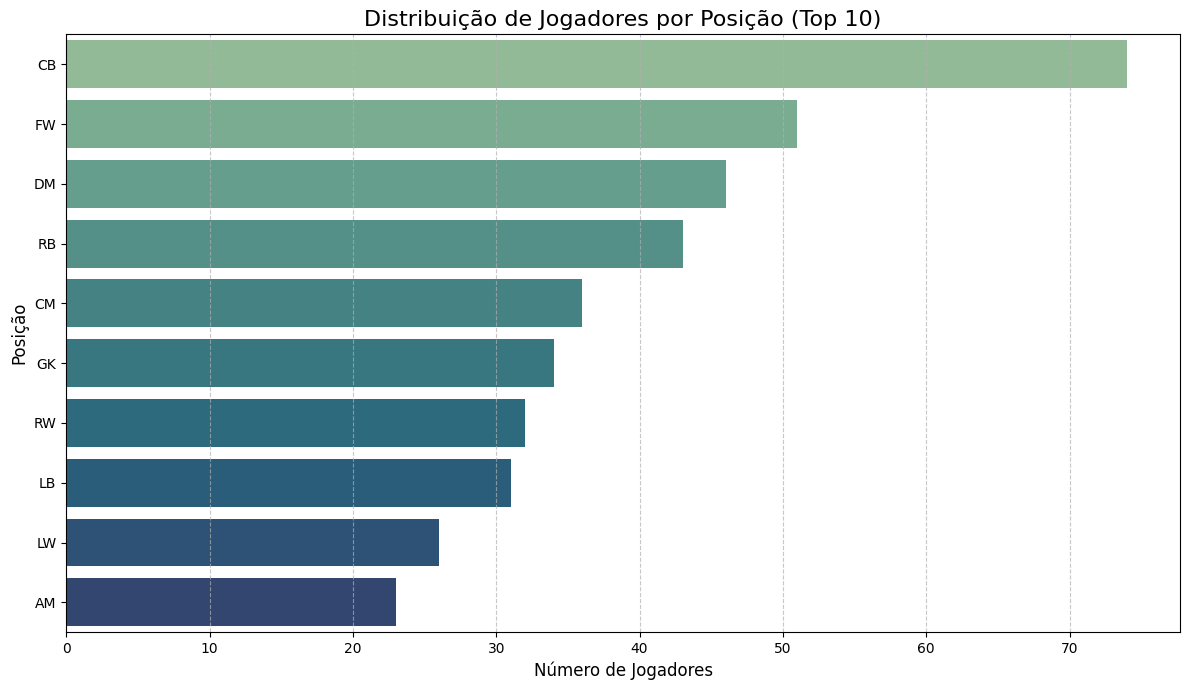

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(y=df['Position'], order=df['Position'].value_counts().iloc[:10].index, palette='crest')
plt.title('Distribuição de Jogadores por Posição (Top 10)', fontsize=16)
plt.xlabel('Número de Jogadores', fontsize=12)
plt.ylabel('Posição', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

/tmp/ipython-input-1555279406.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


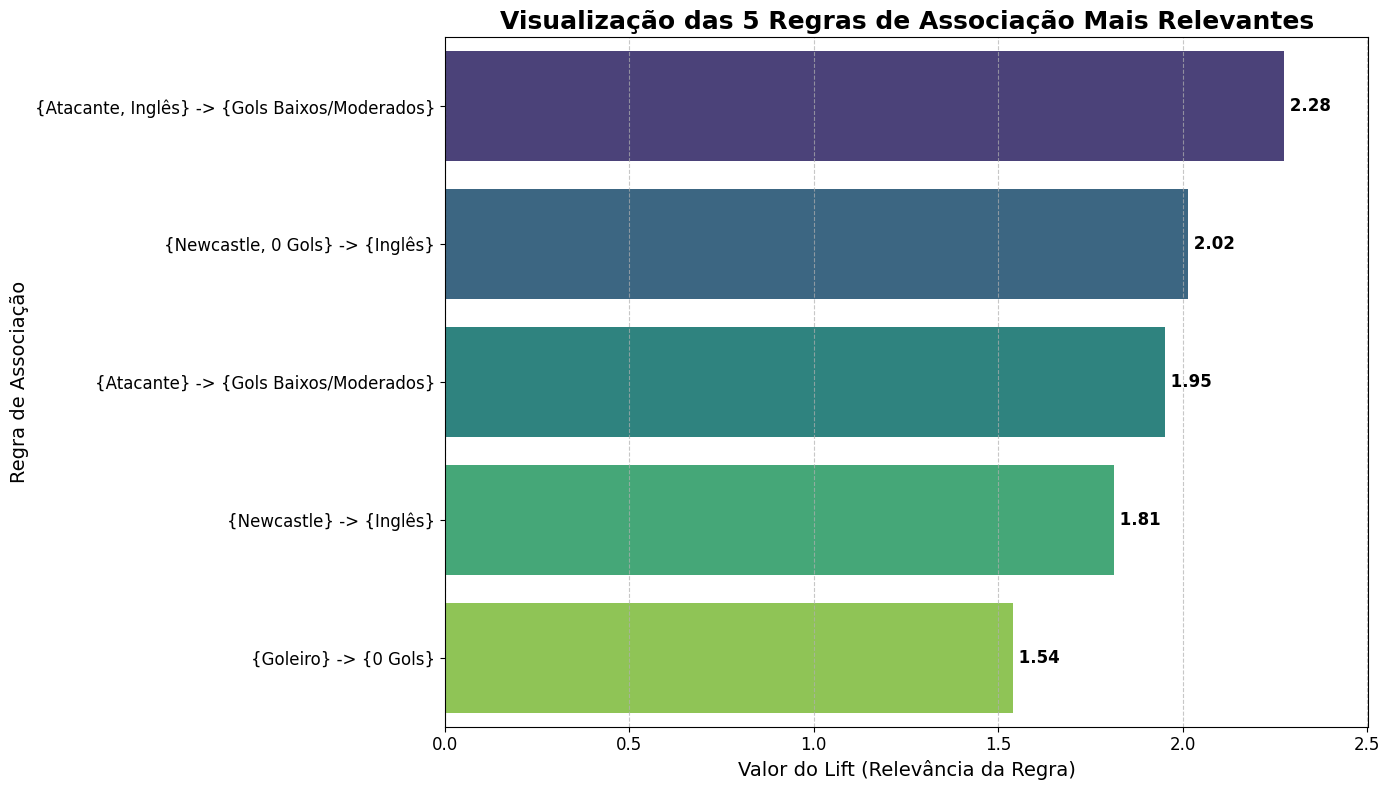

In [ ]:
dados_regras = {
    'regra': [
        "{Atacante, Inglês} -> {Gols Baixos/Moderados}",
        "{Newcastle, 0 Gols} -> {Inglês}",
        "{Atacante} -> {Gols Baixos/Moderados}",
        "{Newcastle} -> {Inglês}",
        "{Goleiro} -> {0 Gols}"
    ],
    'lift': [2.276, 2.016, 1.952, 1.815, 1.541]
}
df_regras_finais = pd.DataFrame(dados_regras)

df_regras_finais = df_regras_finais.sort_values(by='lift', ascending=False)

plt.figure(figsize=(14, 8))

barplot = sns.barplot(
    x='lift',
    y='regra',
    data=df_regras_finais,
    palette='viridis',
    orient='h'
)

for index, value in enumerate(df_regras_finais['lift']):
    plt.text(value, index, f' {value:.2f}', va='center', fontsize=12, fontweight='bold')

plt.title('Visualização das 5 Regras de Associação Mais Relevantes', fontsize=18, fontweight='bold')
plt.xlabel('Valor do Lift (Relevância da Regra)', fontsize=14)
plt.ylabel('Regra de Associação', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, df_regras_finais['lift'].max() * 1.1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()